# Model project

This project examine the OLG model with PAYG system. The model will be analysed analytically and numerically. Furthermore the effect of a change in tax will be analysed in steady state. 

In [1]:
# Import python modules
import numpy as np
from scipy import optimize
import sympy as sm
from types import SimpleNamespace
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# Import local modules
import analytical as an
import numerical as nm

### The construction of the model

We are examining an economy with a constant population growth rate, $n>0$, where individuals live for two periods. During period $t$ individuals work and save their money, and in periode $t+1$ they live off their savings. Furthermore the market consist of identical competitive firms that maximizes their profit using Cobb-Douglas technology. Their production function therefore combines labor, $L_t$, and capital, $K_t$, such that $Y= A K_t^\alpha L_t^{(1-\alpha)}$, with $\alpha\in(0,1)$. Finally full capital depreciation is assumed. Profit maximization leads to further equations:
$$r_t = \alpha A k_t^{(\alpha-1)},$$
$$w_t = (1-\alpha)A k_t^\alpha,$$
where $r_t$ denotes the rental rate of capital, $w_t$ denotes the wage rate, and $k_t$ denotes capital per worker. 


The individuals born in period $t$ have further utility function:
$$U_t = \ln c_{1t} + \beta \ln c_{2t+1},$$
where $0 < \beta < 1$. 
The parameter $c_{1t}$ denotes consumption when young, and $c_{2t+1}$ denotes consumption when old. The young individuals use all their time endowment working, which is therefore set to 1. The goverment runs a social security system which in place is an unfunded pay-as-you-go system where the young individuals make contributions to the current old generation. The young individuals therefore pays a contribution $d$ of thair wages. The parameter $d$ is then given by $d_t = \tau w_t $ where $\tau \in (0,1)$. The contributions are payed to the old generation in the same period, and their consumption is therefore sustained by their savings and the contributions. The budget constraints in the two periods of life are therefore given by:
$$c_{1t}+s_t = (1-\tau)w_t,$$
$$c_{2t+1} = (1+r_{t+1})s_t + (1+n) d_{t+1}.$$

Because it is only the young generation that saves money, the capital accumulation is given by:
$$K_{t+1}=s_t(w_t,(1+r_{t+1}))L_t \Leftrightarrow k_{t+1} = \frac{s_t(w_t,(1+r_{t+1}))}{1+n}$$

### Analytical analysis

First we find the Euler equation and the optimal equation for savings


In [2]:
# a. Importing the class from modelproject.py
model = an.OLGmodelClass()
par = model.par

The Euler equation shows the optimal path of consumption. We derive this from the savings problem of a young individual, which is
$$\max_{c_{1t}, c_{2t+1}} \ln c_{1t} + \beta \ln c_{2t+1},$$
subject to
$$c_{1t}+s_t = (1-\tau)w_t,$$
$$c_{2t+1} = (1+r_{t+1})s_t + (1+n) d_{t+1}.$$

In [3]:
print('The utility function is given by')
display(sm.Eq(par.Ut, model.utility()))
print('The intertemporal budget constraint is given by')
display(sm.Eq(0, model.budgetconstraint()))
print('The Euler is given by')
model.euler()

The utility function is given by


Eq(U_t, log(c_1t) + log(c_{2t+1})/(rho + 1))

The intertemporal budget constraint is given by


Eq(0, -w_t*(1 - tau) + (c_1t*r_{t+1} + c_1t + c_{2t+1} - n*tau*w_{t+1} - tau*w_{t+1})/(r_{t+1} + 1))

The Euler is given by


Eq(c_{2t+1}*(rho + 1)/(r_{t+1} + 1), c_1t)

Replacing $c_{1t}$ and $c_{2t+1}$ with the budgets constraint reveals the optimal saving in period $t$:

In [4]:
print('The optimal saving is')
display(sm.Eq(par.st, model.optimalsavings()))

The optimal saving is


Eq(s_t, (w_t*(-r_{t+1}*tau + r_{t+1} - tau + 1) + w_{t+1}*(-n*rho*tau - n*tau - rho*tau - tau))/(r_{t+1}*rho + 2*r_{t+1} + rho + 2))

### Finding the capital accumulation and steady state capital level

We substitute the optimal saving into the capital law of motioin to find the capital accumulation.

In [5]:
model.capitalaccumulation()

The capital accumulation is


Eq(k_{t+1}, A*k_t**alpha*(1 - alpha)*(1 - tau)/((1 + tau*(1 - alpha)*(rho + 1)/(alpha*(rho + 2)))*(n + 1)*(rho + 2)))

We use the capital accumulation to find the steady state level of capital. We substitute $k^*$ for $k_t$ and $k_{t+1}$. Afterwards, we find an analytical solution of the steady state level of capital for given parameter values. 

In [6]:
# a. Defining parameter values 
alpha2 = 1/3
rho = 0.25
n2 = 0.01
tau2 = 0.25
A2 = 20

# b. Finding  and printing the analytical solution 
print('The steady state level of capital is defined as')
k_star_func = sm.lambdify(args = (par.alpha, par.rho, par.n, par.tau, par.A), expr=model.steadystate_capital())

# c. Printing the solution
print('Steady state capital level with given parameter values is: ')
k_star_func(alpha2,rho,n2,tau2,A2)

The steady state level of capital is defined as


Eq(k^*, (A*(1 - alpha)*(1 - tau)/((1 + tau*(1 - alpha)*(rho + 1)/(alpha*(rho + 2)))*(n + 1)*(rho + 2)))**(1/(1 - alpha)))

Steady state capital level with given parameter values is: 


6.390887399044313

## Numerical solution


In this section, the results found in the analytical analysis in section 2.1 are tested against a numerical optimization of the model with the intention of finding the optimal level of capital, $k^*$, for a given set of parameter values.

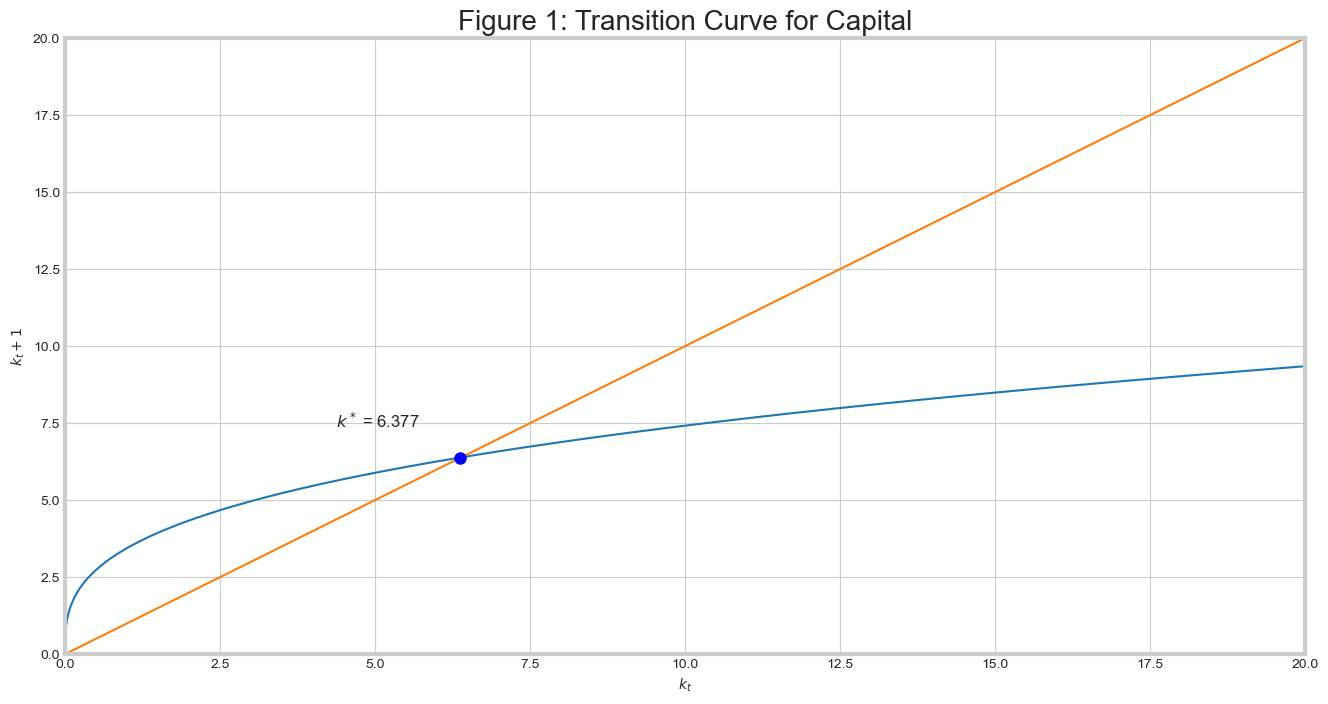

From numerical optimization, the optimal level of capital per capita is: 6.3774


In [7]:
# a. The OLG class is called
num_class = nm.OLG_modelClass()
         
# b. Plotting the optimal level of capital in the transition diagram

# i. The function describing the transition curve is called    
num_class.transition_curve()

# ii. The figure is called and defined
figure = plt.figure(figsize=(16,8))
ax = figure.add_subplot(1,1,1)

# iii. From the module, num_class, the graphs of the transition diagram are called
num_class.plot_transition_curve(ax)
num_class.plot_45_curve(ax)
plt.plot(num_class.ss, num_class.ss, 'o', markersize=8, color='blue')
plt.annotate(f'$k^*$ = {num_class.ss:.3f}', (num_class.ss-2, num_class.ss+1), size=12)
plt.title('Figure 1: Transition Curve for Capital', loc='center', size=20)
ax.spines['bottom'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)

# iv. Display figure
plt.show()

# c. Print solution to the numerical analysis 
print(f'From numerical optimization, the optimal level of capital per capita is: {(num_class.ss):.4f}')

# Further analysis

### Steady state value of capital with varying parameter values

A function of capital per capita in steady state is constructed with flexible parameters, and baseline parameter values are defined. 

In [8]:
# a. Construction of steady state function with flexible parameter values
def steadystate(A, alpha, rho, n, tau):
    output = k_star_func(A, alpha, rho, n, tau)
    print(f'The steady state value of capital per capita solved for given parameter values is: {output:.3f}')
    
# b. Baseline parameter values
alpha2 = 1/3
rho2 = 0.25
n2 = 0.01
tau2 = 0.25
A2 = 20 

In [9]:
# Showing a widget slider
widgets.interact(
        steadystate, 
        A = widgets.FloatSlider(description="A", min=0, max=100, step=0.01, value=A2, continuous_update=False),  
        alpha = widgets.FloatSlider(description="$\\alpha$", min=0.01, max=0.99, step=0.01, value=alpha2, continuous_update=False),
        rho = widgets.FloatSlider(description="$\\rho$", min=0, max=0.99, step=0.01, value=rho2,  continuous_update=False),
        n = widgets.FloatSlider(description="n", min=-0.99, max=0.99, step=0.01, value=n2, continuous_update=False),    
        tau = widgets.FloatSlider(description="$\\tau$", min=0, max=0.99, value=tau2, step=0.01, continuous_update=False)

)

interactive(children=(FloatSlider(value=20.0, continuous_update=False, description='A', step=0.01), FloatSlide…

<function __main__.steadystate(A, alpha, rho, n, tau)>

### Graphic presentation of capital accumulation with varying tax rates

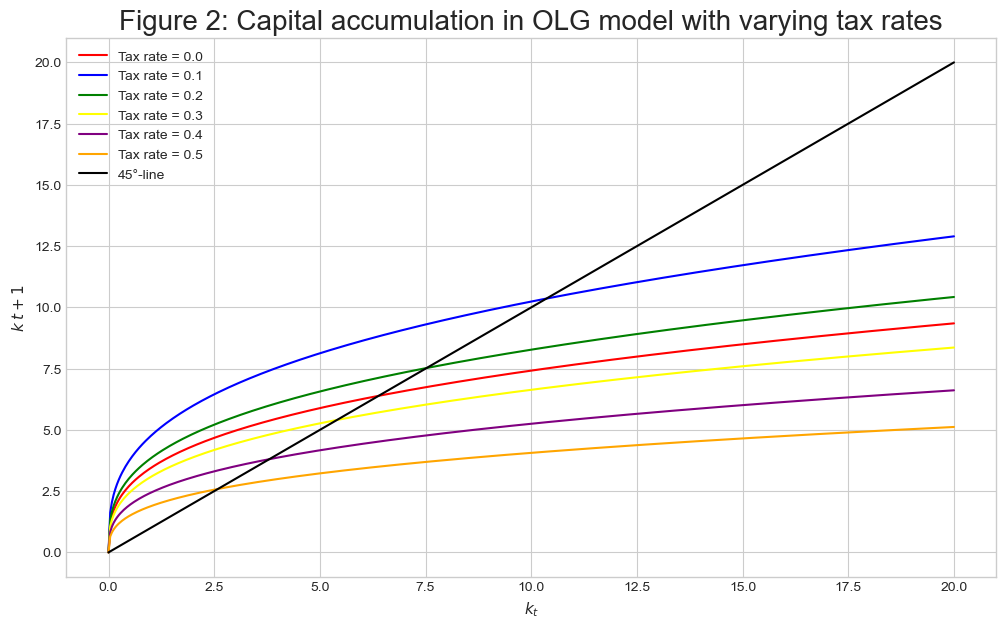

In [10]:
# a. Graphic presentation of the transition curve 
def plot_steadystate(k_t, alpha, rho, n, A, tau):                                
    return (alpha*(1/(1+rho))*A*k_t**alpha*(alpha*tau-alpha-tau+1))/(alpha*(1/(1+rho))*n+alpha*(1/(1+rho))-alpha*tau*n+alpha*n-alpha*tau+alpha+ n*tau+tau)

# b. Defining capital in each period and differing value of tax rates
k_t = np.linspace(0,20,500)
tau3=0.1
tau4=0.2
tau5=0.3
tau6=0.4
tau7=0.5


# c. Plot and display figure
fig = plt.figure(figsize = (12,7))
ax = fig.add_subplot(1,1,1)
plt.plot(k_t, plot_steadystate(k_t, alpha2, rho2, n2, A2, tau2), 'r') 
plt.plot(k_t, plot_steadystate(k_t, alpha2, rho2, n2, A2, tau3), 'b') 
plt.plot(k_t, plot_steadystate(k_t, alpha2, rho2, n2, A2, tau4), 'g')
plt.plot(k_t, plot_steadystate(k_t, alpha2, rho2, n2, A2, tau5), 'yellow')
plt.plot(k_t, plot_steadystate(k_t, alpha2, rho2, n2, A2, tau6), 'purple')
plt.plot(k_t, plot_steadystate(k_t, alpha2, rho2, n2, A2, tau7), 'orange')
plt.plot(k_t,k_t, 'black' )
plt.title('Figure 2: Capital accumulation in OLG model with varying tax rates', fontsize=20)
plt.legend(('Tax rate = 0.0', 'Tax rate = 0.1','Tax rate = 0.2','Tax rate = 0.3','Tax rate = 0.4', 'Tax rate = 0.5', '45\N{DEGREE SIGN}-line'), loc='upper left')
plt.xlabel('$ k_t $', fontsize=11)
plt.ylabel( '$ k_ {t + 1} $', fontsize=11)

plt.grid(True)
plt.show()

# Conclusion

In this analysis, we solved the OLG model with PAYG system analytically and numerically. Both revealed approximately same results for the value of capital accumulation in equilibrium for for similar parameter values. 

Applying a non-negative tax rate on income will result in lower steady state value of capital per capita as seen from both the interactive plot of the analytical solution in section **3.0.1** and the graphic presentation of the transition curve in section **3.0.2**. This align with economic intuition, as higher tax rates will lower savings and thus capital accumulation.